In [4]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [5]:
# Reading Dataset
# Dataset is from https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction
data=pd.read_csv("fake_job_postings.csv")

In [6]:
# Reading top 5 rows of our dataset
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [7]:
# To check the number of rows and column
data.shape

(17880, 18)

In [8]:
data.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [9]:
# let us check the missing values in our dataset

data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [10]:
# Let us remove the columns which are not necessary
# axis =1 specifies that the values are column value and inplace=true to make these changes permanent (ie. make these dropes of columns permanent in the data set)
# We have droped salary range because 70% approx null value
# also job_id and other irrelvent columns because they does not have any logical meaning
data.drop(['job_id', 'salary_range', 'telecommuting', 'has_company_logo', 'has_questions'],axis=1,inplace = True)

In [11]:
data.head()

,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [12]:
# Fill NaN values with blank space
# inplace=true to make this change in the dataset permanent
data.fillna(' ', inplace=True)

In [13]:
#!pip uninstall scikit-learn
#!pip uninstall imbalanced-learn

In [14]:
!pip install scikit-learn==1.2.2
!pip install imbalanced-learn==0.10.1


     ---------------------------------------- 8.3/8.3 MB 7.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.1
    Uninstalling scikit-learn-1.2.1:
      Successfully uninstalled scikit-learn-1.2.1


In [15]:
import numpy as np
import pandas as pd

# Assuming 'data' is your DataFrame
columns = data.columns.tolist()

# Filter the columns to remove the target column
columns = [c for c in columns if c not in ["fraudulent"]]

# Store the variable we are predicting
target = "fraudulent"

# Define independent and dependent variables
X = data[columns]
Y = data[target]

# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

# Resampling the data to address class imbalance
from imblearn.under_sampling import RandomUnderSampler

under_sampler = RandomUnderSampler(random_state=42)
X_res, y_res = under_sampler.fit_resample(X, Y)

# Creating DataFrames from the resampled data
df1 = pd.DataFrame(X_res, columns=columns)
df3 = pd.DataFrame(y_res, columns=[target])

# Combining the resampled features and target into one DataFrame
result = pd.concat([df1, df3], axis=1)

# Displaying the result
display(result)

# Updating the original data with the resampled data
data = result


(17880, 12)
(17880,)


,title,location,department,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function,fraudulent
0,SEM Coordinator,"GR, I, Athens",,#URL_c379aa631173ed5b7c345ab3f500a9a053e509138...,The right candidate will be responsible for co...,- Previous experience of minimum 3 years...,- Attractive Remuneration Package.- ...,Full-time,,,,,0
1,Senior Data Scientist,"GB, LND, London",Engineering,"As a growing and successful startup, Conversoc...",Conversocial builds software that helps compan...,Good working knowledge of Python or similar la...,Salary of £40-55k plus stock options£2k annual...,,,,,Engineering,0
2,Junior Web Marketing Specialist,"GR, I, Ilion",Web Marketing και Social,Η Atnet Communications A.E. είναι μια αμιγώς ε...,Η Atnet Communications αναζητά Junior Web Mark...,Απαιτούμενα προσόντα:Hands-on εμπειρία στην δι...,H θέση αφορά μόνιμη απασχόληση στην περιοχή το...,Full-time,Entry level,,Marketing and Advertising,Marketing,0
3,New Product Development Project Leader - Full ...,"US, GA, Atlanta",,We Provide Full Time Permanent Positions for m...,Coordination and project management of New Pro...,"Location - Atlanta, GA, USAJob Type – Permanen...",,Full-time,Mid-Senior level,Bachelor's Degree,Management Consulting,Management,0
4,Data Intern - Retail & Apparel Analysis,"GB, LND, London",Fashion:Internships,"We build software for fashion retailers, to he...",About EDITDEDITD’s software is the market lead...,,,Other,Internship,,Apparel & Fashion,,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1727,Student Positions Part-Time and Full-Time.,"US, CA, Los Angeles",,,Student Positions Part-Time and Full-Time.You ...,,,Part-time,,,,,1
1728,Sales Associate,"AU, NSW, Sydney",Sales and Marketing,,LEARN TO EARN AN EXECUTIVE LEVEL INCOMEFULL TR...,What You Can Do. • Have the potential to earn ...,Who We Are We are a Global Leadership Developm...,,,,,,1
1729,Android Developer,"PL, MZ, Warsaw",,,inFullMobile Sp. z o.o. is a mobile software d...,• A proven track record in Android / JAVA proj...,attractive salary (adequate to the candidate s...,,,,,,1
1730,Payroll Clerk,"US, NY, New York",,,JOB DESCRIPTIONWe are seeking a full time payr...,JOB REQUIREMENTS• High school diploma or eq...,We offer a competitive salary and benefits pac...,Full-time,,,Apparel & Fashion,Accounting/Auditing,1


In [16]:
print("Class distribution before resampling:\n", Y.value_counts())
print("Class distribution after resampling:\n", y_res.value_counts())


Class distribution before resampling:
 0    17014
1      866
Name: fraudulent, dtype: int64
Class distribution after resampling:
 0    866
1    866
Name: fraudulent, dtype: int64


In [17]:
data.shape

(1732, 13)

In [18]:
data.isnull().sum()
# data cleaning done

title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

# Explaratory Data Analysis

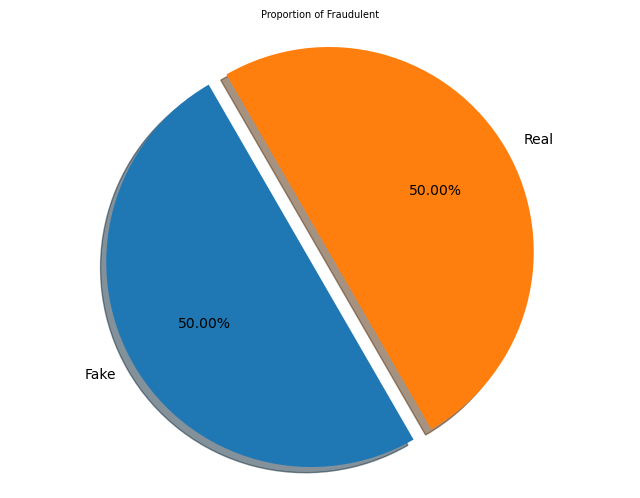

In [19]:
 # Checking for distribution of class label(percentages belonging to real class and percentages belonging to fraud class)
 # in the data 1 indicates fraud post
 # 0 indicating real post
 # Plotting pie chart for the data
 # function of Explode function: how the portion will appear (to understand change explode=(0,0.5))

labels = 'Fake', 'Real'
sizes = [data.fraudulent[data['fraudulent']== 1].count(), data.fraudulent[data['fraudulent']== 0].count()]
explode = (0, 0.1) 
fig1, ax1 = plt.subplots(figsize=(8, 6)) #size of the pie chart
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=120) #autopct %1.2f%% for 2 digit precision
ax1.axis('equal')
plt.title("Proportion of Fraudulent", size = 7)
plt.show() 

In [20]:
# we will try to see which country is posting most of the jobs
# Visualize job postings by countries
# we will use the location column for visualizing this data
# In location data is of type (country_name,state,city)
# we neeed to know the country wise data

def split(location):
    l = location.split(',')
    return l[0]

data['country'] = data.location.apply(split)
data['country']

0       GR
1       GB
2       GR
3       US
4       GB
        ..
1727    US
1728    AU
1729    PL
1730    US
1731    US
Name: country, Length: 1732, dtype: object

In [21]:
# this will give unique country values
data['country'].nunique()

52

In [22]:
# top 10 country that post jobs 
data['country'].value_counts()[:11]

US    1236
GB     128
GR      61
AU      47
        40
CA      36
NZ      26
DE      23
IN      15
MY      12
EE       7
Name: country, dtype: int64

Text(0.5, 0, 'Countries')

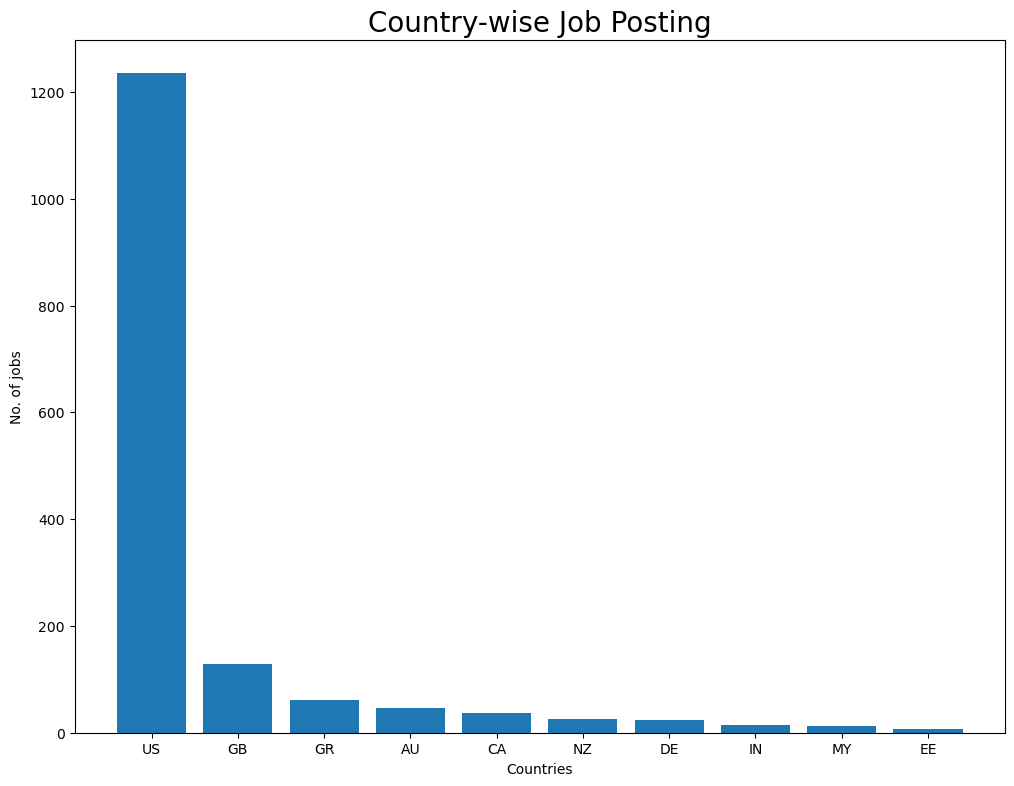

In [23]:
# creating a dictionary(key-value pair) with top 10 country
country = dict(data.country.value_counts()[:11])
del country[' '] #deleting country with space values
plt.figure(figsize=(12,9))
plt.title('Country-wise Job Posting', size=20)
plt.bar(country.keys(), country.values()) #(xaxis,yaxis)
plt.ylabel('No. of jobs', size=10)
plt.xlabel('Countries', size=10)

In [24]:
country.keys()

dict_keys(['US', 'GB', 'GR', 'AU', 'CA', 'NZ', 'DE', 'IN', 'MY', 'EE'])

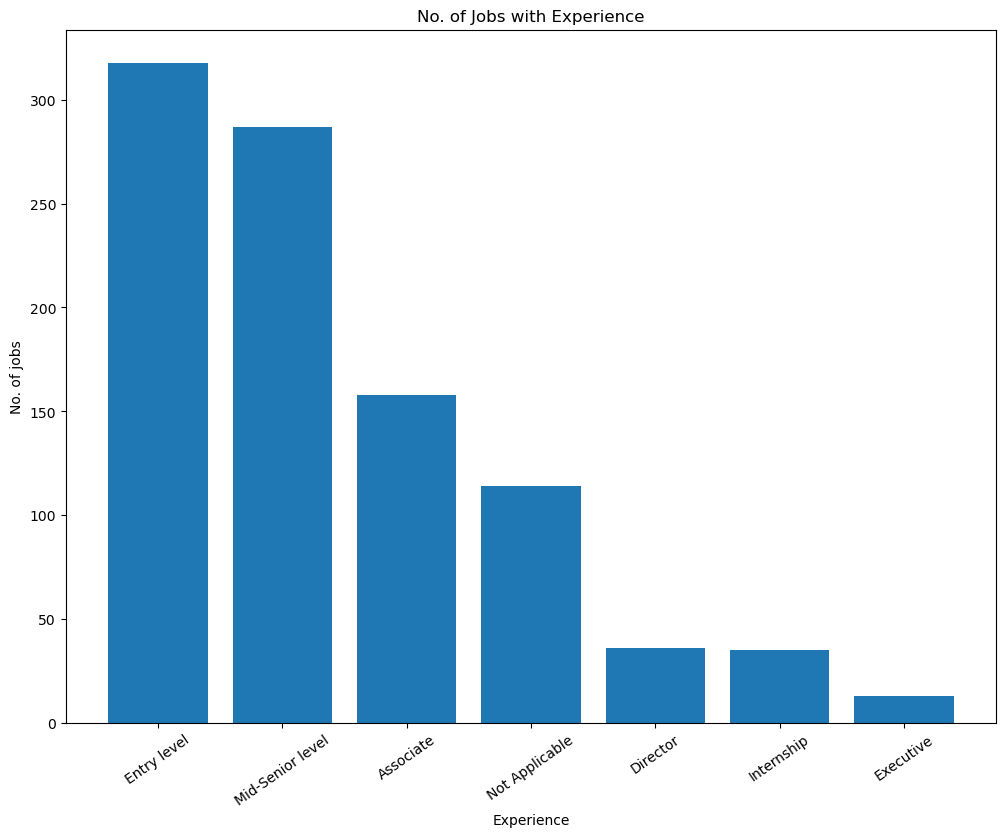

In [25]:
# visualizing jobs based on experience
experience = dict(data.required_experience.value_counts())
del experience[' ']
plt.figure(figsize=(12,9))
plt.bar(experience.keys(), experience.values())
plt.title('No. of Jobs with Experience')
plt.xlabel('Experience', size=10)
plt.ylabel('No. of jobs', size=10)
plt.xticks(rotation=35)
plt.show()

In [26]:
# Task: This data is Inbalanced, it contains 95% of real jobs and only 5% fake jobs,but we can make it balance
# Try this out

In [27]:
#Most frequent jobs
print(data.title.value_counts()[:10])

Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Data Entry Admin/Clerical Positions - Work From Home                    21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         19
Administrative Assistant                                                18
English Teacher Abroad                                                  16
Graduates: English Teacher Abroad (Conversational)                      14
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Payroll Clerk                                                           10
Account Sales Managers $80-$130,000/yr                                  10
Name: title, dtype: int64


In [28]:
#Titles and count of fraudulent jobs
# checking for most fake jobs based on title
print(data[data.fraudulent==1].title.value_counts()[:10])

Data Entry Admin/Clerical Positions - Work From Home                    21
Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Account Sales Managers $80-$130,000/yr                                  10
Network Marketing                                                       10
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Name: title, dtype: int64


In [29]:
# For textual type data we will try to create word cloud 
# but before that we will try to create text combining all the data present in
# our database.
data['text'] = data['title']+' '+data['location']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']+' '+data['benefits']+' '+data['industry']

del data['title']
del data['location']
del data['department']
del data['company_profile']
del data['description']
del data['requirements']
del data['benefits']
del data['required_experience']
del data['required_education']
del data['industry']
del data['function']
del data['country']
del data['employment_type']


In [30]:
data.head()

,fraudulent,text
0,0,"SEM Coordinator GR, I, Athens #URL_c379aa63117..."
1,0,"Senior Data Scientist GB, LND, London As a gro..."
2,0,"Junior Web Marketing Specialist GR, I, Ilion Η..."
3,0,New Product Development Project Leader - Full ...
4,0,"Data Intern - Retail & Apparel Analysis GB, LN..."


In [32]:
!pip install wordcloud

     -------------------------------------- 300.0/300.0 kB 4.7 MB/s eta 0:00:00


**Understanding the common words used in the texts : Wordcloud**

In [33]:
# we will plot 3 kind of word cloud
# 1st we will visualize all the words our data using the wordcloud plot
# 2nd we will visualize common words in real job posting
# 3rd we will visualize common words in fraud job posting
# join function is a core python function
from wordcloud import WordCloud
all_words = ''.join([text for text in data["text"]]) 

In [34]:
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(all_words)

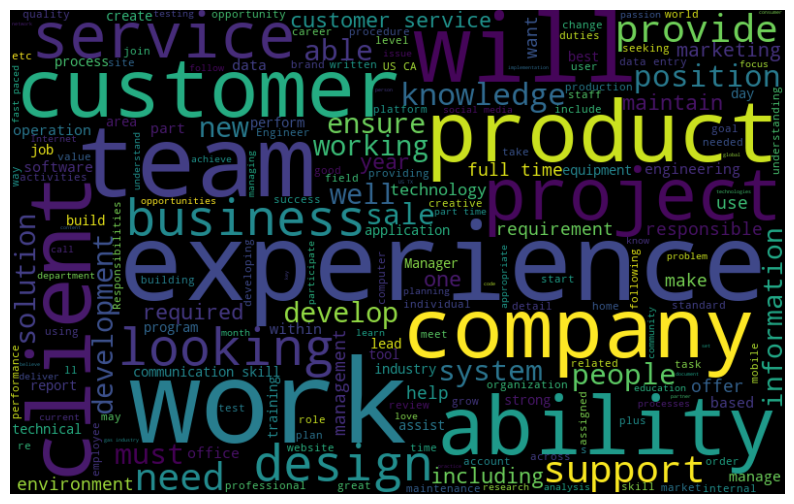

In [35]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
 # Common words in real job posting texts

real_post = ''.join([text for text in data["text"][data['fraudulent']==0]])
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(real_post)


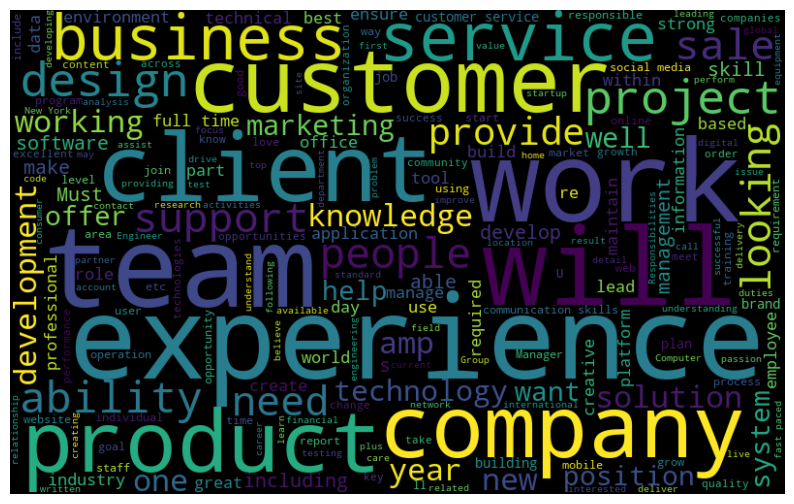

In [37]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [38]:
# Common words in fraud job posting texts

fraud_post = ''.join([text for text in data["text"][data['fraudulent'] == 1]])

In [39]:
wordcloud = WordCloud(width = 800, height = 500, random_state=21, max_font_size=120).generate(fraud_post)

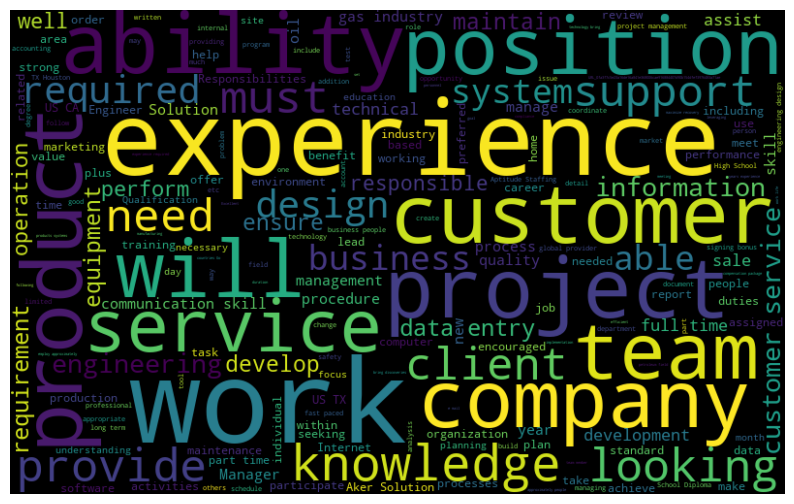

In [40]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Data *Preapration*

In [41]:
# NLTK :: Natural Language Toolkit
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [43]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Text Preprocessing Function
def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = text.lower()  # Convert to lowercase
    tokens = text.split()
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

# Apply preprocessing to the text data
data['text'] = data['text'].apply(preprocess_text)


In [44]:
data['text'][0]

'sem coordinator gr athens url_c379aa631173ed5b7c345ab3f500a9a053e509138ca70e52c1088e5a784dc8d7 modern online travel agency founded athens 2005 today company one leading online travel agency greece presence 25 country europe asia america office athens bucharest sao paulo right candidate responsible coordinating one dynamic ppc account travel industry responsible planning developing deploying reporting sem campaign close contact company management account manager google furthermore responsible oversight monthly budget campaign monitoring company kpis key performance indicator performance metric sem coordinator experience working large ppc account travel industry various market several language qualified candidate also knowledge various internet marketing channel search engine statistical analysis general marketing principle responsibility manage analyze optimize international google adwords yandex bing campaign develop implement ppc strategy search display network research analyze keywo

In [45]:
from sklearn.model_selection import train_test_split
# Splitting dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(data.text, data.fraudulent, test_size=0.3)

In [46]:
# what does X-train and y_train contain
print(y_train)
print(X_train)


1019    1
19      0
267     0
561     0
127     0
       ..
77      0
3       0
83      0
476     0
1147    1
Name: fraudulent, Length: 1212, dtype: int64
1019    code compliance officer u ok oklahoma city acc...
19      junior sale representative ca bc vancouver com...
267     customer service associate u tn memphis novite...
561     entry level opportunity top security provider ...
127     senior web developer ideas2life startup team p...
                              ...                        
77      english teacher abroad conversational u tx lub...
3       new product development project leader full ti...
83      front end developer gr athens trebbble mobile ...
476     demand manager gb london axonix global mobile ...
1147    security officer u tx austin accion story bega...
Name: text, Length: 1212, dtype: object


In [78]:
# Combine X_test and y_test back into a single DataFrame for easier viewing
test_data = pd.concat([X_test, y_test], axis=1)

# Save the test dataset to a CSV file with UTF-8 encoding
test_data.to_csv('test_data.csv', index=False, encoding='utf-8')

In [47]:
# The model cannot operate text data so we need to convert our data into vector format
# we will be using Bag of words model 
from sklearn.feature_extraction.text import CountVectorizer

#  instantiate the vectorizer
vect = CountVectorizer()

# learn training data vocabulary, then use it to create a document-term matrix
# fit
vect.fit(X_train)

# transform training data
X_train_dtm = vect.transform(X_train)


In [48]:
# examine the document-term matrix
X_train_dtm

#how X_train_dtm is looking
print(X_train_dtm)
# This is Matrix representation,non 0 valued cells are not printed

  (0, 1)	2
  (0, 35)	1
  (0, 227)	1
  (0, 297)	1
  (0, 331)	1
  (0, 548)	4
  (0, 784)	1
  (0, 814)	1
  (0, 922)	1
  (0, 1028)	1
  (0, 1186)	1
  (0, 1195)	1
  (0, 1197)	1
  (0, 1263)	1
  (0, 1321)	1
  (0, 1357)	1
  (0, 1537)	1
  (0, 1540)	1
  (0, 1631)	1
  (0, 1677)	1
  (0, 1740)	1
  (0, 1777)	1
  (0, 1926)	1
  (0, 1971)	2
  (0, 2119)	1
  :	:
  (1211, 15113)	2
  (1211, 15270)	1
  (1211, 15491)	5
  (1211, 15896)	1
  (1211, 16000)	1
  (1211, 16107)	2
  (1211, 16201)	1
  (1211, 16202)	1
  (1211, 16214)	1
  (1211, 16238)	1
  (1211, 16455)	2
  (1211, 16461)	1
  (1211, 16585)	1
  (1211, 17001)	1
  (1211, 17082)	1
  (1211, 17202)	1
  (1211, 17233)	1
  (1211, 17272)	2
  (1211, 17368)	1
  (1211, 17486)	1
  (1211, 17578)	1
  (1211, 17586)	1
  (1211, 17625)	1
  (1211, 17654)	2
  (1211, 17806)	2


In [49]:
# PCA is not advisable for a NLP task,because PCA is for 
# principal feature extraction and in this case we already have features

In [50]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<520x18459 sparse matrix of type '<class 'numpy.int64'>'
	with 76295 stored elements in Compressed Sparse Row format>

# Model Building & evaluation

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB

<h2>Naive Bayes</h2>

In [52]:
# Naive Bayes Classifier
# we are using Multinomial Naive Bayes approach because the data here is not symmetrical.
# generally if there are data in the form of this long text,it is advisable to 
# %time will give the time taken by the system for execution
nb = MultinomialNB()
%time nb.fit(X_train_dtm, y_train)

CPU times: total: 31.2 ms
Wall time: 20.4 ms


MultinomialNB()

In [53]:
y_pred_nb = nb.predict(X_test_dtm)
print(y_pred_nb)

[0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0
 1 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0
 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0
 1 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0
 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 0
 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 0 1
 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1
 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 1
 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1
 1 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 1 0 1 0 0
 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1
 1 0 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1
 0 0 1 0 0 0 1 0 1 1 0 1 

Classification Accuracy: 0.8903846153846153
Classification Report

              precision    recall  f1-score   support

           0       0.87      0.91      0.89       253
           1       0.91      0.88      0.89       267

    accuracy                           0.89       520
   macro avg       0.89      0.89      0.89       520
weighted avg       0.89      0.89      0.89       520

Confusion Matrix

[[229  24]
 [ 33 234]]


Text(95.72222222222221, 0.5, 'Truth')

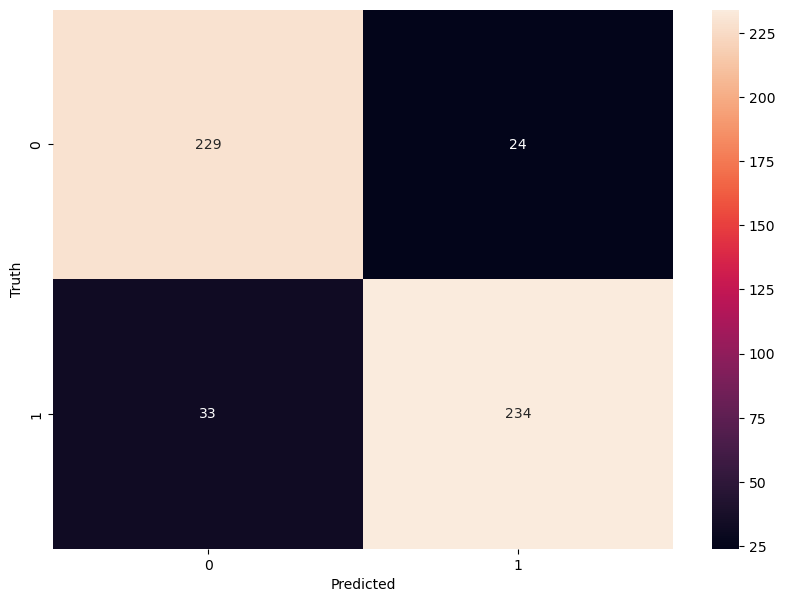

In [54]:
import seaborn as sn

accuracy_score(y_test, y_pred_nb)
print("Classification Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report\n")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_nb))


cm = confusion_matrix(y_test,y_pred_nb)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

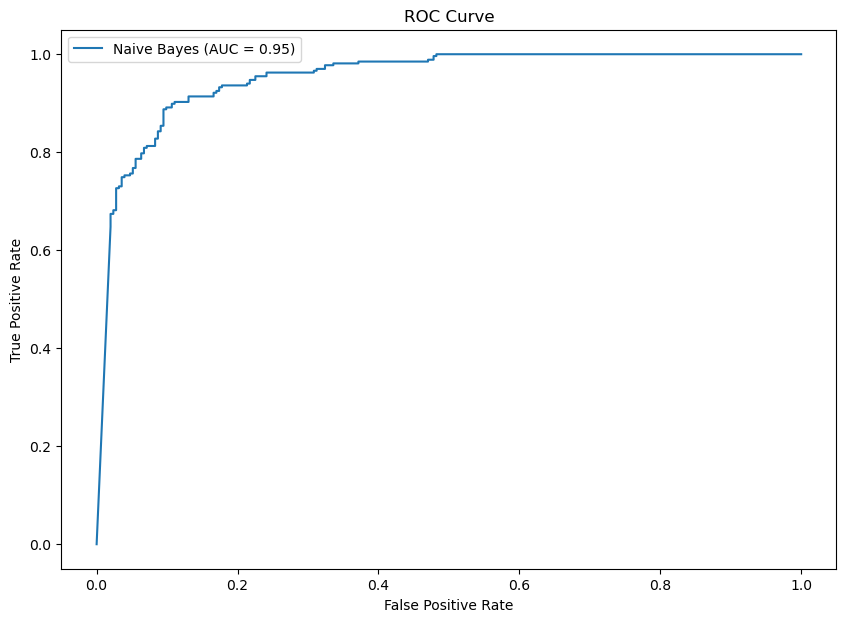

In [55]:
# ROC-AUC Score and Plot for Naive Bayes
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob_nb = nb.predict_proba(X_test_dtm)[:, 1]

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
roc_auc_nb = roc_auc_score(y_test, y_prob_nb)

plt.figure(figsize=(10, 7))
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


<h2>Decision Tree Classifier</h2>

In [56]:
#instantiate a Decision Tree Classifier
dt = DecisionTreeClassifier()

In [57]:
#train the model 
# using X_train_dtm (timing it with an IPython "magic command")

%time dt.fit(X_train_dtm, y_train)

CPU times: total: 1.92 s
Wall time: 2.16 s


DecisionTreeClassifier()

In [58]:
# make class predictions for X_test_dtm
y_pred_class = dt.predict(X_test_dtm)

In [59]:
# Model Accuracy
print("Classification Accuracy:", accuracy_score(y_test, y_pred_class))
print("Classification Report\n")
print(classification_report(y_test, y_pred_class))
print("Confusion Matrix\n")
print(confusion_matrix(y_test, y_pred_class))



Classification Accuracy: 0.8038461538461539
Classification Report

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       253
           1       0.82      0.79      0.81       267

    accuracy                           0.80       520
   macro avg       0.80      0.80      0.80       520
weighted avg       0.80      0.80      0.80       520

Confusion Matrix

[[207  46]
 [ 56 211]]


Text(95.72222222222221, 0.5, 'Truth')

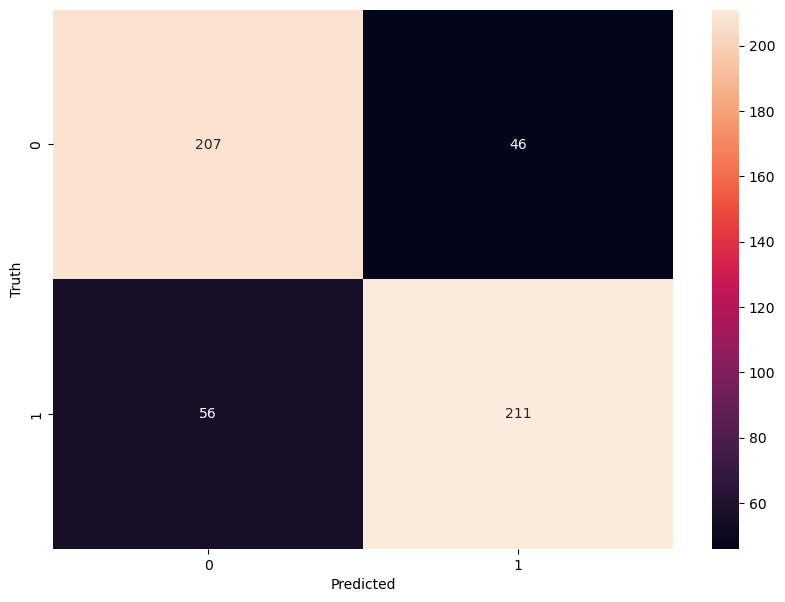

In [60]:
# Confusion Matrix

import seaborn as sn
cm = confusion_matrix(y_test,y_pred_class)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

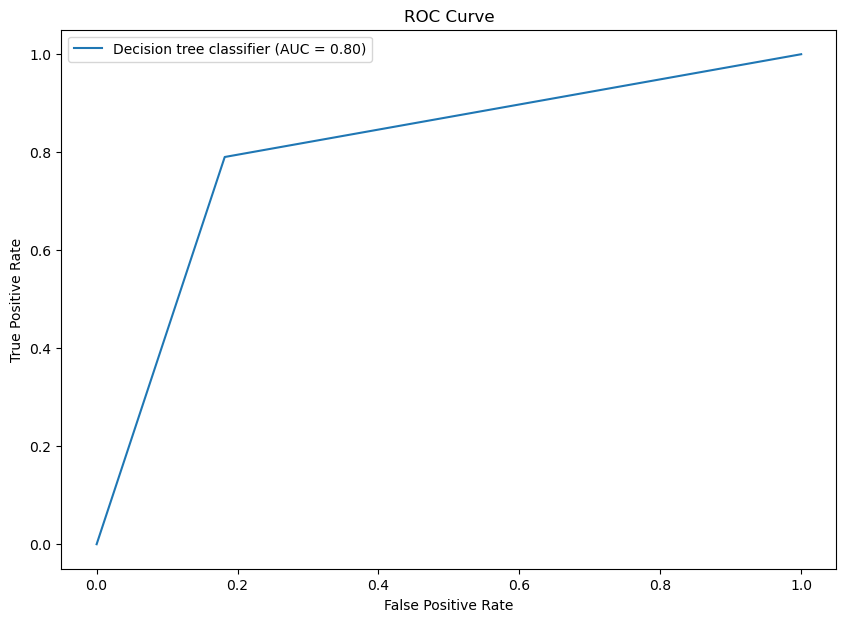

In [61]:
# ROC-AUC Score and Plot for Decision tree classifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob_dt = dt.predict_proba(X_test_dtm)[:, 1]

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)

plt.figure(figsize=(10, 7))
plt.plot(fpr_dt, tpr_dt, label=f'Decision tree classifier (AUC = {roc_auc_dt:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# Logistic Regression Classifier

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_dtm, y_train)
y_pred_lr = lr_model.predict(X_test_dtm)

Classification Accuracy: 0.8846153846153846
Logistic Regression Classification Report

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       253
           1       0.89      0.88      0.89       267

    accuracy                           0.88       520
   macro avg       0.88      0.88      0.88       520
weighted avg       0.88      0.88      0.88       520

[[225  28]
 [ 32 235]]


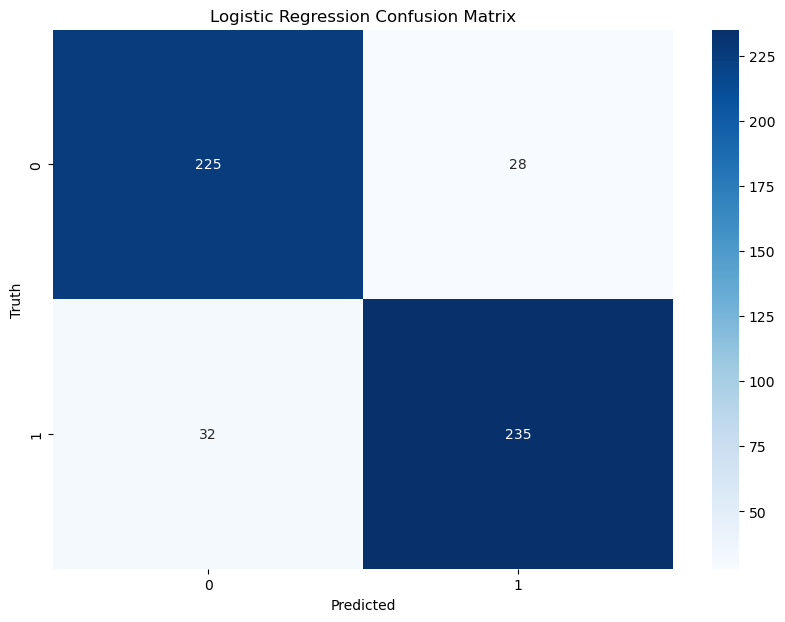

In [63]:
print("Classification Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression Classification Report\n")
print(classification_report(y_test, y_pred_lr))
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

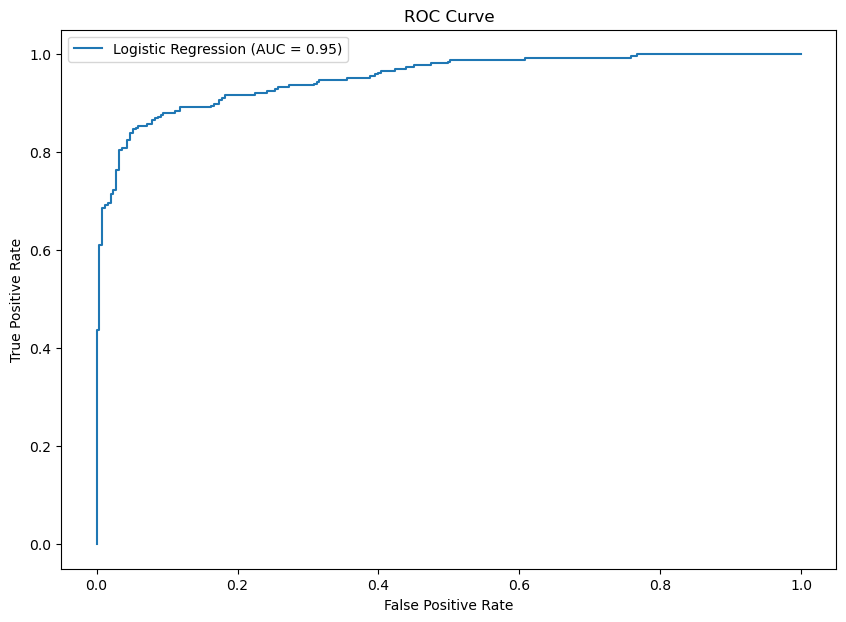

In [64]:
# ROC-AUC Score and Plot for Logistic regresson
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob_lr = lr_model.predict_proba(X_test_dtm)[:, 1]

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = roc_auc_score(y_test, y_prob_lr)

plt.figure(figsize=(10, 7))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# Random Forest Classifier

In [65]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_dtm, y_train)
y_pred_rf = rf_model.predict(X_test_dtm)

Classification Accuracy: 0.9019230769230769
Random Forest Classification Report

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       253
           1       0.94      0.87      0.90       267

    accuracy                           0.90       520
   macro avg       0.90      0.90      0.90       520
weighted avg       0.90      0.90      0.90       520

[[237  16]
 [ 35 232]]


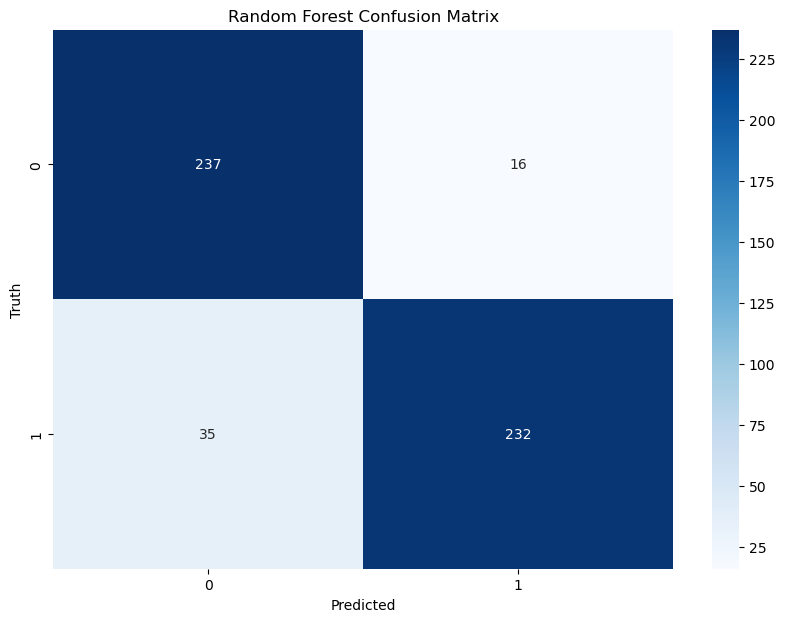

In [66]:
print("Classification Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report\n")
print(classification_report(y_test, y_pred_rf))
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Random Forest Confusion Matrix')
plt.show()

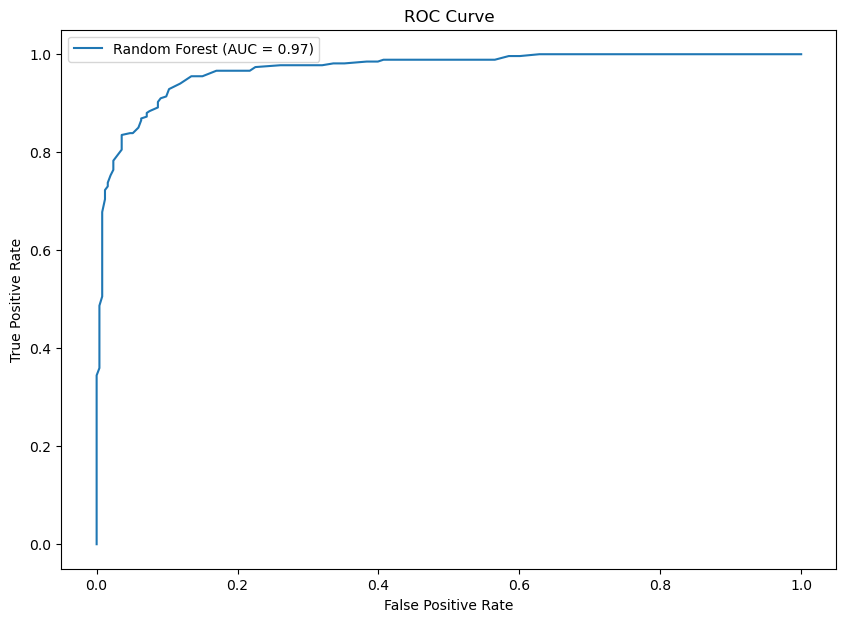

In [67]:
# ROC-AUC Score and Plot for Random Forest
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob_rf = rf_model.predict_proba(X_test_dtm)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(10, 7))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# Support Vector Machine Classifier

In [68]:
svm_model = SVC(probability=True)
svm_model.fit(X_train_dtm, y_train)
y_pred_svm = svm_model.predict(X_test_dtm)

Classification Accuracy: 0.8692307692307693
SVM Classification Report

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       253
           1       0.90      0.84      0.87       267

    accuracy                           0.87       520
   macro avg       0.87      0.87      0.87       520
weighted avg       0.87      0.87      0.87       520

[[228  25]
 [ 43 224]]


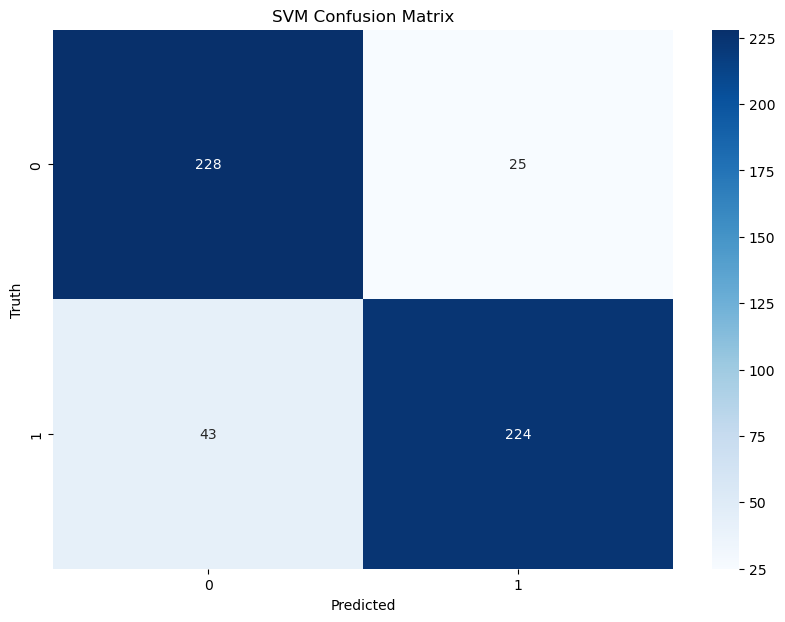

In [69]:
print("Classification Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Classification Report\n")
print(classification_report(y_test, y_pred_svm))
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('SVM Confusion Matrix')
plt.show()

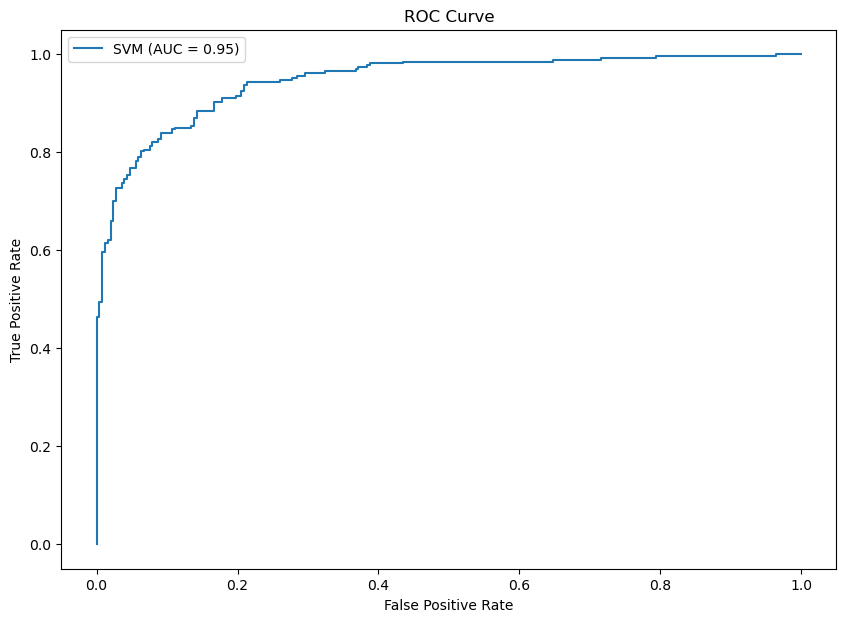

In [70]:
# ROC-AUC Score and Plot for SVM
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob_svm = svm_model.predict_proba(X_test_dtm)[:, 1]

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)

plt.figure(figsize=(10, 7))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [71]:
import joblib  # To save and load models

In [72]:
# Save the trained model and vectorizer
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(vect, 'bow_vectorizer.pkl')

# Load the model and make predictions on new data
def predict_fraudulent_job_posting(text):
    # Load the model and vectorizer
    rf_model = joblib.load('random_forest_model.pkl')
    vect = joblib.load('bow_vectorizer.pkl')
    
    # Preprocess the input text
    text_dtm = vect.transform([text])
    
    # Make prediction
    prediction = rf_model.predict(text_dtm)
    
    return prediction[0]

In [73]:
print(X_test)

73      director io u tx austin emerging technology ag...
652     junior sale manager f de sn leipzig webdata so...
574     javascript guru front end engineer gb lnd lond...
1362    process safety engineer u ca bakersfield staff...
489     part time pizza delivery driver wallasey gb wr...
                              ...                        
593     jr account executive u ca irvine happyfox youn...
1164    home based commission role u variety commissio...
707     linux system administrator ca toronto unotelly...
1059    easy money u fl deltona dmt instant reward hir...
1541    project engineer medical device 2048 u wi meno...
Name: text, Length: 520, dtype: object


In [79]:
# Example usage
new_text = X_test[574]
prediction = predict_fraudulent_job_posting(new_text)
print("Prediction (0 = Real, 1 = Fraudulent):", prediction)

Prediction (0 = Real, 1 = Fraudulent): 0


In [80]:
print(y_test[574])

0


In [82]:
new_text "accounting clerk 23 u dc accounting clerk work tight deadline responsible accounting activity supporting accounting team responsibility process vendor invoice match receiving slip vendor invoice process debit credit memo research respond inquiry vendor administrative staffbalance reconcile credit card accountparticipate audit compliance activity needed participate special project needed ensure account reconciliation correct completed timely mannermaintain office file including invoice purchase order disbursementskeep management informed activity significant problemsother duty needed computer knowledge data entry account payable processing experience required excel skill required sap similar system experience plusminimum 2 year experience accounting must excellent written oral communication skill benefit include health dental life ad amp insurance employee wellness 401k url_c801649eeb4007728c8f41b2d6629d92c2295ff77e1f2d401d7696ce3569db63 time holiday generous company discount"
prediction = predict_fraudulent_job_posting(new_text)
print("Prediction (0 = Real, 1 = Fraudulent):", prediction)

SyntaxError: invalid syntax (3102461786.py, line 1)